In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import date


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Abhishek/test/test_2/2/Datasets/LSTM/Sales Forecasting_Train Data.xlsx")

In [ ]:
df.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,NaN,Bombay (Mumbai),1.0,1.0,2005.0,72.2
1,Asia,India,NaN,Bombay (Mumbai),1.0,2.0,2005.0,72.7
2,Asia,India,NaN,Bombay (Mumbai),1.0,3.0,2005.0,74.3
3,Asia,India,NaN,Bombay (Mumbai),1.0,4.0,2005.0,78.9
4,Asia,India,NaN,Bombay (Mumbai),1.0,5.0,2005.0,81.5


In [ ]:
df1 = df[df['Total_Sales'] >= 0]

In [ ]:
df1.shape

(17479, 8)

In [ ]:
df.shape

(17536, 8)

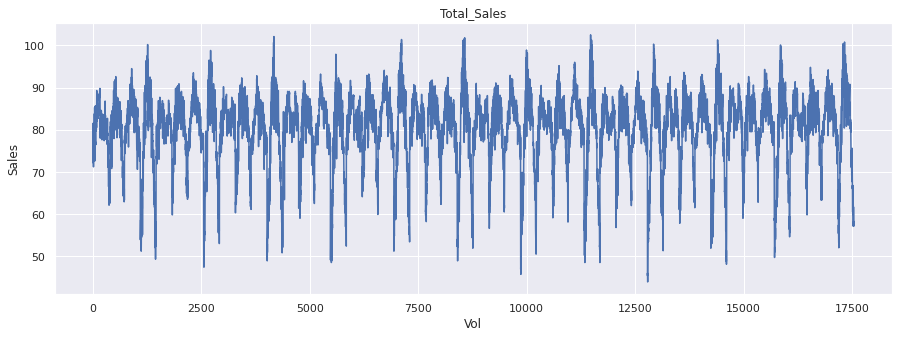

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df1.Total_Sales )
plt.title("Total_Sales")
plt.xlabel("Vol")
plt.ylabel("Sales");

In [ ]:
Total_Sales=df1.filter(['Total_Sales'])

In [ ]:
Total_Sales.head()

,Total_Sales
0,72.2
1,72.7
2,74.3
3,78.9
4,81.5


In [ ]:
Sales=Total_Sales.values

In [ ]:
type(Sales)

numpy.ndarray

In [ ]:
Sales

array([[72.2],
       [72.7],
       [74.3],
       ...,
       [59.3],
       [57.1],
       [58.3]])

In [ ]:
training_data_length = math.ceil(len(Sales)*0.8) # dividing the dataset into 80 by 20

In [ ]:
mms=MinMaxScaler(feature_range=(0, 1))

In [ ]:
scaled_sales=mms.fit_transform(Sales)

In [ ]:
training_data=scaled_sales[0:training_data_length,:]

In [ ]:
X_train=[]
y_train=[]

In [ ]:
for i in range(100 ,len(training_data)): 
    X_train.append(training_data[i-100:i,0])
    y_train.append(training_data[i,0])

In [ ]:
X_train[0]

array([0.48293515, 0.49146758, 0.51877133, 0.59726962, 0.64163823,
       0.59556314, 0.56996587, 0.60409556, 0.59556314, 0.55802048,
       0.55972696, 0.55972696, 0.59556314, 0.54948805, 0.5665529 ,
       0.53924915, 0.52730375, 0.46587031, 0.48122867, 0.56143345,
       0.58191126, 0.52901024, 0.48976109, 0.50511945, 0.50682594,
       0.49317406, 0.5443686 , 0.54778157, 0.54607509, 0.54266212,
       0.55460751, 0.58532423, 0.60921502, 0.61945392, 0.64334471,
       0.6331058 , 0.61774744, 0.62627986, 0.64334471, 0.68088737,
       0.6552901 , 0.62286689, 0.66211604, 0.70648464, 0.68088737,
       0.63481229, 0.63822526, 0.59897611, 0.56996587, 0.54607509,
       0.48976109, 0.56996587, 0.57167235, 0.53412969, 0.57849829,
       0.63651877, 0.7116041 , 0.66723549, 0.60921502, 0.61433447,
       0.60238908, 0.60238908, 0.5887372 , 0.58703072, 0.57508532,
       0.55460751, 0.5665529 , 0.55631399, 0.57679181, 0.60068259,
       0.62116041, 0.64163823, 0.65187713, 0.65358362, 0.65699

In [ ]:
y_train[0]

0.6706484641638225

In [ ]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((13884, 100), (13884,))

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #reshaping the X_train as LSTM take 3 inputs
print(X_train.shape)

(13884, 100, 1)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

In [ ]:
model = Sequential() # Buliding LSTM model

In [ ]:

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))



model.add(LSTM(units = 50, return_sequences = True))
model.add(keras.layers.Dropout(rate=0.15)) # to curb overfitting


model.add(LSTM(units = 50, return_sequences = True))
model.add(keras.layers.Dropout(rate=0.15)) # to curb overfitting


model.add(LSTM(units = 50))

In [ ]:
# Adding the output layer
model.add(Dense(units = 1)) #No activation function for output neuron as it's a regression problem


model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # callback is initiated if loss is not changing to much lesser values
model.fit(X_train, y_train, epochs = 30, batch_size = 32, callbacks= callback )

Epoch 1/30
434/434 [==============================] - 48s 92ms/step - loss: 0.0099
Epoch 2/30
434/434 [==============================] - 40s 93ms/step - loss: 0.0049
Epoch 3/30
434/434 [==============================] - 40s 92ms/step - loss: 0.0036
Epoch 4/30
434/434 [==============================] - 40s 92ms/step - loss: 0.0026
Epoch 5/30
434/434 [==============================] - 40s 92ms/step - loss: 0.0022
Epoch 6/30
434/434 [==============================] - 40s 92ms/step - loss: 0.0019
Epoch 7/30
434/434 [==============================] - 40s 93ms/step - loss: 0.0019
Epoch 8/30
434/434 [==============================] - 40s 93ms/step - loss: 0.0018
Epoch 9/30
434/434 [==============================] - 40s 93ms/step - loss: 0.0018
Epoch 10/30
434/434 [==============================] - 40s 92ms/step - loss: 0.0017
Epoch 11/30
434/434 [==============================] - 40s 92ms/step - loss: 0.0016
Epoch 12/30
434/434 [==============================] - 40s 93ms/step - loss: 0.0017
E

In [ ]:
# Now lets predict the values but before it we need to get test data from the dataset 
test_data=scaled_sales[training_data_length-100:,:]

In [ ]:
len(test_data)

3595

In [ ]:
X_test=[]
y_test=Sales[training_data_length:,:]

In [ ]:
for i in range(100,len(test_data)):
    X_test.append(test_data[i-100:i,0])

In [ ]:
X_test=np.array(X_test)

In [ ]:
X_test.shape

(3495, 100)

In [ ]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
y_pred=model.predict(X_test) # predicting 

In [ ]:
y_pred=mms.inverse_transform(y_pred)

In [ ]:
pd.DataFrame(y_pred) # printing the predicted values

,0
0,91.787605
1,90.478531
2,90.423965
3,89.263176
4,90.097946
...,...
3490,63.895832
3491,63.601646
3492,64.013153
3493,61.560211


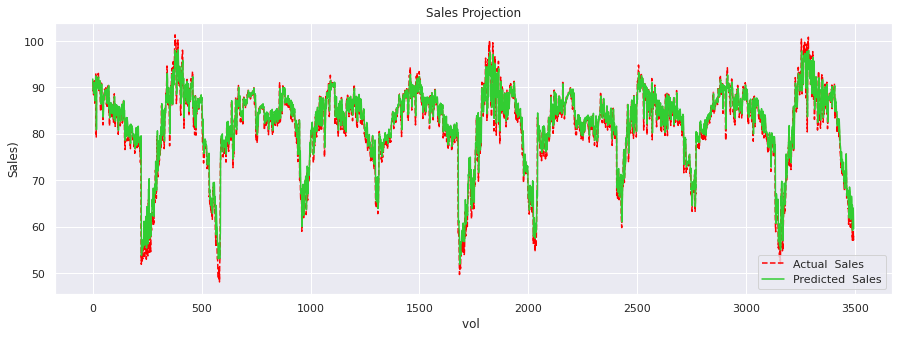

In [45]:
# Visualising the results
plt.figure(figsize=(15,5))
plt.plot(y_test, color = 'red', label = 'Actual  Sales',ls='--')
plt.plot(y_pred, color = 'limegreen', label = 'Predicted  Sales',ls='-')
plt.title('Sales Projection')
plt.xlabel('vol ')
plt.ylabel('Sales)')
plt.legend()
plt.show()

In [ ]:
train=Total_Sales[:training_data_length]
test=Total_Sales[training_data_length:]
test['pred']=y_pred

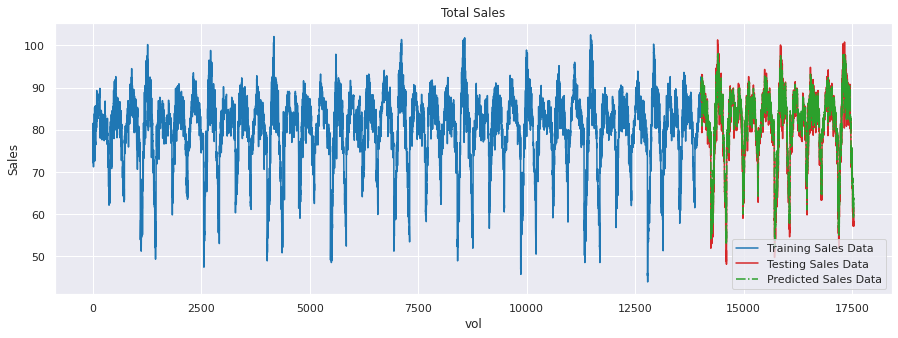

In [46]:
plt.figure(figsize=(15,5))
plt.plot(train['Total_Sales'], color = 'tab:blue', label = 'Training Sales Data',ls='-')
plt.plot(test['Total_Sales'], color = 'tab:red', label = 'Testing Sales Data',ls='-')
plt.plot(test['pred'], color = 'tab:green', label = 'Predicted Sales Data',ls='dashdot')
plt.title('Total Sales')
plt.xlabel('vol')
plt.ylabel('Sales')
plt.legend()
plt.show()